# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [3]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
    
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    dx = (x_lim[1] - x_lim[0])/grid[0];
    dy = (y_lim[1] - y_lim[0])/grid[1];
    
    x = np.arange(x_lim[0]+0.5*dx, x_lim[1], dx)
    y = np.arange(y_lim[0]+0.5*dy, y_lim[1], dy)
    
    xy, yx = np.meshgrid(x,y)
    
    rx = [[random_component*np.random.uniform(-0.5*dx, 0.5*dx) for i in range(grid[0])] for j in range(grid[1])]
    ry = [[random_component*np.random.uniform(-0.5*dy, 0.5*dy) for i in range(grid[0])] for j in range(grid[1])]
    
    xy += rx
    yx += ry
    
    xx = xy.flatten()
    yy = yx.flatten()
    
    return pd.DataFrame({'X': xx, 'Y': yy})
    
    # raise NotImplementedError()
    
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    area = (x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    w = intensity * area
    
    n = np.random.poisson(w)
    
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    
    return pd.DataFrame({'X': x, 'Y': y})
    
    # raise NotImplementedError()
    
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    def intensity_f(param):
        return -intensity_function(param[0], param[1])
    
    opt = sp.optimize.minimize(intensity_f, [sum(x_lim)/2, sum(y_lim)/2], method="Nelder-Mead", bounds=(tuple(x_lim), tuple(y_lim)))
    i_max = -opt.fun
    
    points = homogeneous_poisson_on_rectangle(i_max, x_lim, y_lim)
    n = len(points['X'])
    p = (1-(intensity_function(points['X'], points['Y'])/i_max)).to_frame()
    p.reset_index(drop=True, inplace=True)
    
    delete = np.random.uniform(0,1,(n,1))<p
    points.drop(delete[delete['X']==True].index, inplace=True)
    
    return pd.DataFrame({'X': points['X'], 'Y': points['Y']})
    
    # raise NotImplementedError()
    
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    x_new = [x_lim[0]-cluster_radius, x_lim[1]+cluster_radius]
    y_new = [y_lim[0]-cluster_radius, y_lim[1]+cluster_radius]
    
    parent = homogeneous_poisson_on_rectangle(parent_intensity, x_new, y_new)
    df = pd.DataFrame()
    
    for x,y in parent.values:
        daughter = homogeneous_poisson_on_rectangle(daughter_intensity, [x-cluster_radius, x+cluster_radius], [y-cluster_radius,y+cluster_radius])
        daughter = daughter[((daughter['X']-x)**2 + (daughter['Y']-y)**2) <= cluster_radius**2]
        df = pd.concat([df, daughter])
        
    df = df[(df['X'] <= x_lim[1]) & (df['X'] >= x_lim[0]) & (df['Y'] >= y_lim[0]) & (df['Y'] <= y_lim[1])]
    
    return df
    
    # raise NotImplementedError()
    
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    x_new = [x_lim[0]-4*cluster_sigma, x_lim[1]+4*cluster_sigma]
    y_new = [y_lim[0]-4*cluster_sigma, y_lim[1]+4*cluster_sigma]
    
    centers = homogeneous_poisson_on_rectangle(parent_intensity,x_new, y_new)
    
    xx = np.array([])
    yy = np.array([])
    
    for x,y in centers.values:
        n = np.random.poisson(mean_cluster_size)
        xx = np.concatenate((xx, np.random.normal(x, cluster_sigma, n)))
        yy = np.concatenate((yy, np.random.normal(y, cluster_sigma, n)))
        
    df = pd.DataFrame({'X': xx, 'Y': yy})
    
    df = df[(df['X'] >= x_lim[0]) & (df['X'] <= x_lim[1]) & (df['Y'] >= y_lim[0]) & (df['Y'] <= y_lim[1])]
    
    return df
    
    # raise NotImplementedError()
    
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    
    n, x_edge, y_edge = np.histogram2d(points['X'], points['Y'], bins)
    n = np.transpose(n)
    
    return x_edge, y_edge, n

# raise NotImplementedError()

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [4]:
# YOUR CODE HERE

x_lim=[0,10]
y_lim=[0,10]
poisson = homogeneous_poisson_on_rectangle(2.5, x_lim, y_lim)
regular = regular_on_rectangle([15,15], 0.75, x_lim, y_lim)
matern = materna_on_rectangle(0.3, 5, 0.75, x_lim, y_lim)

# raise NotImplementedError()

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [15]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    
    d = []
    for ix, row in points.iterrows():
        act_d = np.sqrt((points['X']-row['X'])**2 + (points['Y']-row['Y'])**2)
        act_d = act_d.drop(ix)
        mind = np.min(act_d)
        d.append(mind)
        
    unique, counts = np.unique(d, return_counts=True)
    
    n = len(d)
    p = counts/n
    g = np.cumsum(p)
    
    g = np.insert(g,0,0)
    unique = np.insert(unique,0,0)
    
    return pd.DataFrame({'D': unique, 'G': g})
    
    # raise NotImplementedError()
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    
    g = 1-np.exp(-intensity*np.pi*d**2)
    
    return pd.DataFrame({'D': d, 'G': g})
    
    # raise NotImplementedError()

#### b) Wygenerowanie danych

In [18]:
# YOUR CODE HERE

gregular = g_function(regular)
teor_regular = g_function_poisson(gregular['D'], 2.5)
gpoisson = g_function(poisson)
teor_poisson = g_function_poisson(gpoisson['D'], 2.5)
gmatern = g_function(matern)
teor_matern = g_function_poisson(gmatern['D'], 2.5)

# raise NotImplementedError()

#### c) Wizualizacja

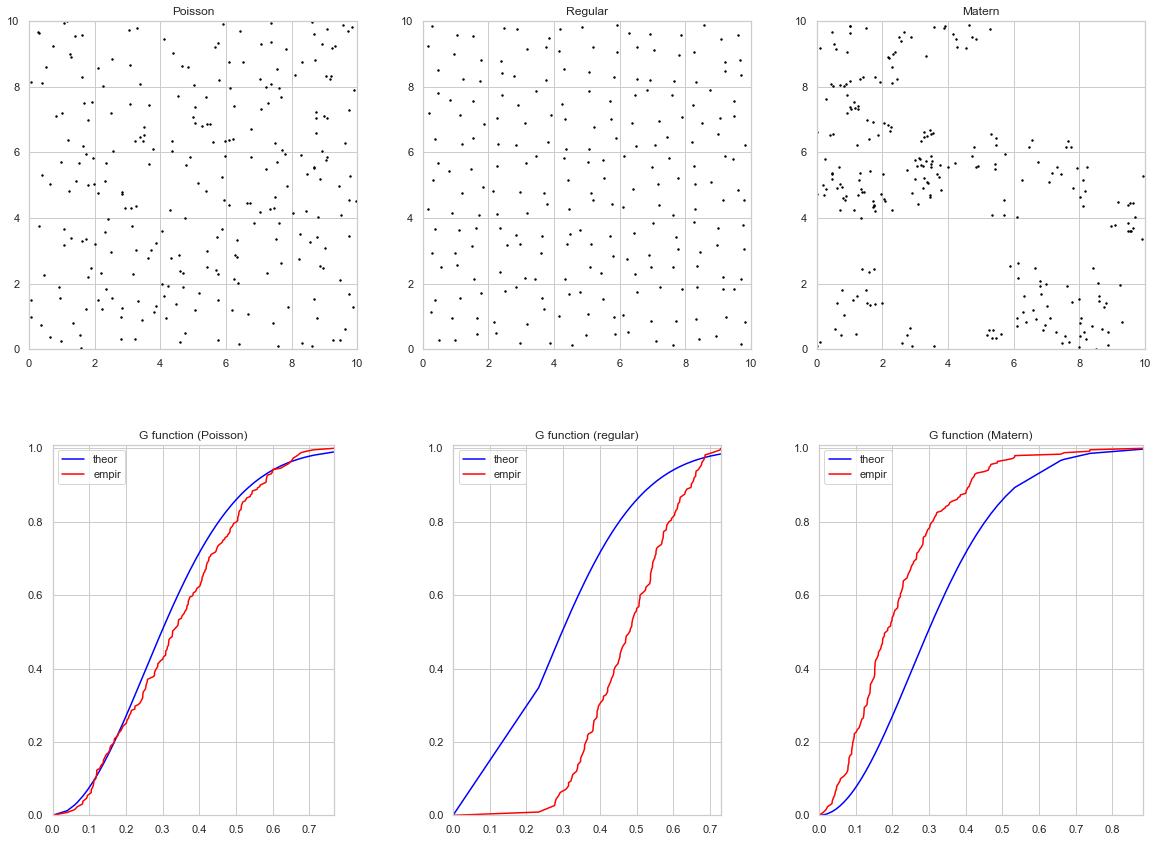

In [17]:
# YOUR CODE HERE

y_lim2=[0,1.01]
fig,ax=plt.subplots(2,3,figsize=(20,15))

ax[0,0].scatter(poisson['X'], poisson['Y'], s=2, c='black')
ax[0,0].set(title="Poisson",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[0,1].scatter(regular['X'], regular['Y'], s=2, c='black')
ax[0,1].set(title="Regular",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[0,2].scatter(matern['X'], matern['Y'], s=2, c='black')
ax[0,2].set(title="Matern",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[1,0].plot(teor_poisson['D'], teor_poisson['G'], c='blue', label="theor")
ax[1,0].plot(gpoisson['D'], gpoisson['G'], c='red', label="empir")
ax[1,0].set(title="G function (Poisson)",aspect='equal', xlim=[0,max(gpoisson['D'])], ylim=y_lim2)
ax[1,0].legend()

ax[1,1].plot(teor_regular['D'], teor_regular['G'], c='blue', label="theor")
ax[1,1].plot(gregular['D'], gregular['G'], c='red', label="empir")
ax[1,1].set(title="G function (regular)",aspect='equal', xlim=[0,max(gregular['D'])], ylim=y_lim2)
ax[1,1].legend()

ax[1,2].plot(teor_matern['D'], teor_matern['G'], c='blue', label="theor")
ax[1,2].plot(gmatern['D'], gmatern['G'], c='red', label="empir")
ax[1,2].set(title="G function (Matern)",aspect='equal', xlim=[0,max(gmatern['D'])], ylim=y_lim2)
ax[1,2].legend()
plt.show()

# raise NotImplementedError()

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [19]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    
    d = sp.spatial.distance.cdist(test_points, points)
    d = np.sort(d, axis=1)
    dmin = d[:,0]
    
    unique, counts = np.unique(dmin, return_counts=True)
    
    n = len(dmin)
    p = counts/n
    f = np.cumsum(p)
    f = np.insert(f,0,0)
    unique = np.insert(unique,0,0)
    
    return pd.DataFrame({'D': unique, 'F': f})
    
    # raise NotImplementedError()
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    
    f = 1-np.exp(-intensity*np.pi*d**2)
    
    return pd.DataFrame({'D': d, 'F': f})
    
    # raise NotImplementedError()

#### b) Wygenerowanie danych

In [22]:
# YOUR CODE HERE

test_points = regular_on_rectangle([100,100], 0.75, x_lim, y_lim)

fregular = f_function(regular, test_points)
teor_regular_f = f_function_poisson(fregular['D'], 2.5)
fpoisson = f_function(poisson, test_points)
teor_poisson_f = f_function_poisson(fpoisson['D'], 2.5)
fmatern = f_function(matern, test_points)
teor_matern_f = f_function_poisson(fmatern['D'], 2.5)

# raise NotImplementedError()

#### c) Wizualizacja

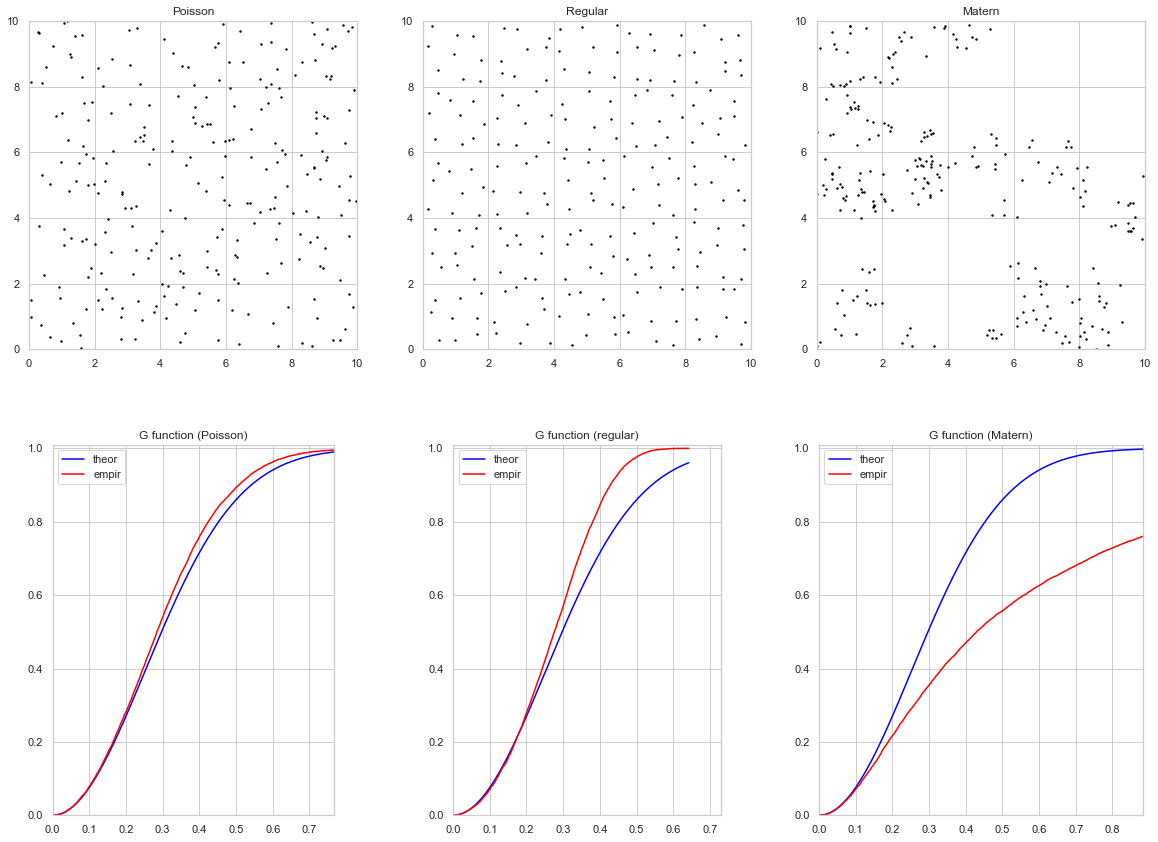

In [24]:
# YOUR CODE HERE

y_lim2=[0,1.01]
fig,ax=plt.subplots(2,3,figsize=(20,15))

ax[0,0].scatter(poisson['X'], poisson['Y'], s=2, c='black')
ax[0,0].set(title="Poisson",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[0,1].scatter(regular['X'], regular['Y'], s=2, c='black')
ax[0,1].set(title="Regular",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[0,2].scatter(matern['X'], matern['Y'], s=2, c='black')
ax[0,2].set(title="Matern",aspect='equal',xlim=x_lim, ylim=y_lim)

ax[1,0].plot(teor_poisson_f['D'], teor_poisson_f['F'], c='blue', label="theor")
ax[1,0].plot(fpoisson['D'], fpoisson['F'], c='red', label="empir")
ax[1,0].set(title="G function (Poisson)",aspect='equal', xlim=[0,max(gpoisson['D'])], ylim=y_lim2)
ax[1,0].legend()

ax[1,1].plot(teor_regular_f['D'], teor_regular_f['F'], c='blue', label="theor")
ax[1,1].plot(fregular['D'], fregular['F'], c='red', label="empir")
ax[1,1].set(title="G function (regular)",aspect='equal', xlim=[0,max(gregular['D'])], ylim=y_lim2)
ax[1,1].legend()

ax[1,2].plot(teor_matern_f['D'], teor_matern_f['F'], c='blue', label="theor")
ax[1,2].plot(fmatern['D'], fmatern['F'], c='red', label="empir")
ax[1,2].set(title="G function (Matern)",aspect='equal', xlim=[0,max(gmatern['D'])], ylim=y_lim2)
ax[1,2].legend()
plt.show()

# raise NotImplementedError()